## Background

### "Your mission as part of the Data Science team is to use data to improve fan engagement and provide insights that will drive monetization strategies for VeloCityX. You will explore user interaction data to draw insights on fan behavior and offer recommendations to optimize fan challenges, merchandise sales, and sponsorship integration. ""

Load and Clean the Data

In [4]:

import pandas as pd

file_path = '/Users/aqsa/Desktop/2025-VeloCityX-Expanded-Fan-Engagement-Data.csv'
data = pd.read_csv(file_path)

data.head()
#data.tail()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


Check for missing values

In [6]:
missing_values = data.isnull().sum()
print(missing_values)

User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64


Aside - this is great! the data is already pretty clean. I am just going to make sure a few things before I rule out cleaning all together.

Verify the data types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [9]:
summary_statistics = data.describe()
print(summary_statistics)

       Fan Challenges Completed  Predictive Accuracy (%)  \
count                100.000000               100.000000   
mean                   5.790000                74.990000   
std                    2.825908                14.033506   
min                    1.000000                50.000000   
25%                    3.000000                62.000000   
50%                    6.000000                77.000000   
75%                    8.000000                86.500000   
max                   10.000000                98.000000   

       Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
count                     100.000000                            100.000000   
mean                        2.670000                              8.680000   
std                         2.064882                              6.340315   
min                         0.000000                              0.000000   
25%                         1.000000                              2.0

### some insights I derived from the statistics above:

The average predictive accuracy for fan challenges is about 75%.
On average, users have purchased around 2.7 virtual merchandise items and clicked on approximately 8.7 ads.
Users spend an average of 129 minutes on the Live 360° feature and send about 25 real-time chat messages.

### EDA to investigate trends

## Correlation Between User Activities

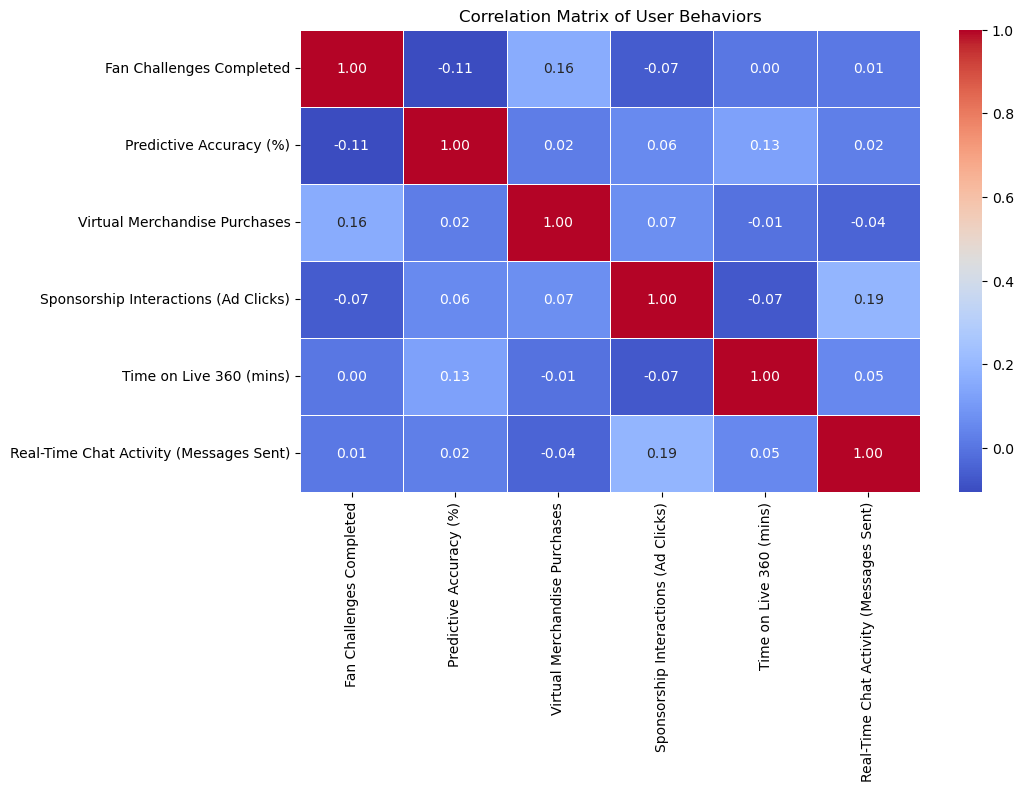

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_data = data.drop(columns=['User ID'])


correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of User Behaviors')
plt.show()


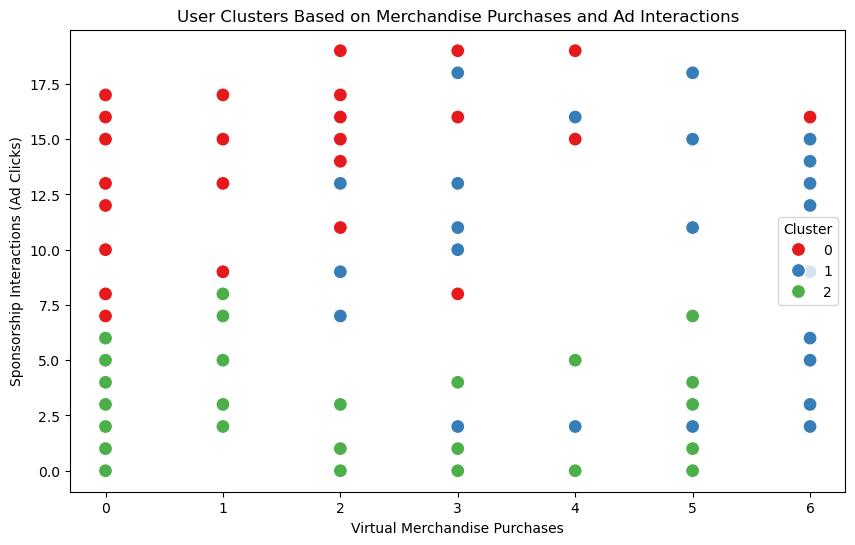

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


features = data[['Fan Challenges Completed', 'Predictive Accuracy (%)', 
                 'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)', 
                 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Virtual Merchandise Purchases', y='Sponsorship Interactions (Ad Clicks)', 
                hue='Cluster', data=data, palette='Set1', s=100)
plt.title('User Clusters Based on Merchandise Purchases and Ad Interactions')
plt.show()


In [15]:
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

cluster_insights = data[['Cluster']].join(numeric_columns).groupby('Cluster').mean()

print(cluster_insights)


         Fan Challenges Completed  Predictive Accuracy (%)  \
Cluster                                                      
0                        4.823529                71.911765   
1                        7.310345                83.551724   
2                        5.486486                71.108108   

         Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
Cluster                                                                        
0                             1.705882                             14.088235   
1                             4.620690                             10.172414   
2                             2.027027                              2.540541   

         Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  
Cluster                                                                    
0                     122.911765                                33.794118  
1                     132.172414                            

Cluster 0: Moderate fan challenge engagement, high ad clicks (14.09), active in chat (33.79 messages), but lower merchandise purchases (1.71).
Cluster 1: Most engaged with fan challenges (7.31) and merchandise purchases (4.62), highest predictive accuracy (83.55%), moderate ad clicks (10.17).
Cluster 2: Spends the most time on Live 360 (133 mins), low ad interaction (2.54), and least active in chat (17.24 messages).
Insights:

Cluster 1: Best for monetization (high challenge engagement and merchandise purchases).
Cluster 0: Key for sponsorships (high ad clicks, chat activity).
Cluster 2: Needs more engagement (low purchases and ad interaction).

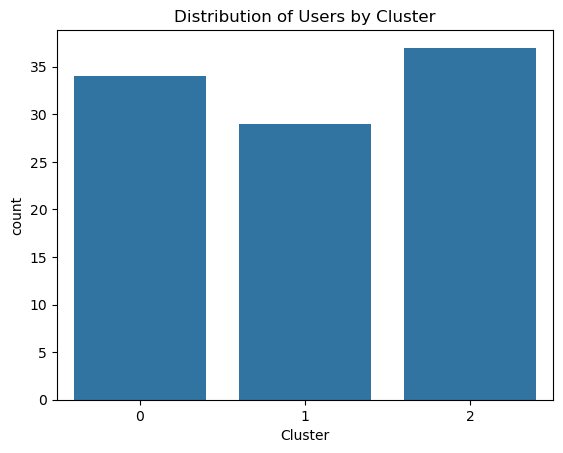

In [16]:
sns.countplot(x='Cluster', data=data)
plt.title('Distribution of Users by Cluster')
plt.show()


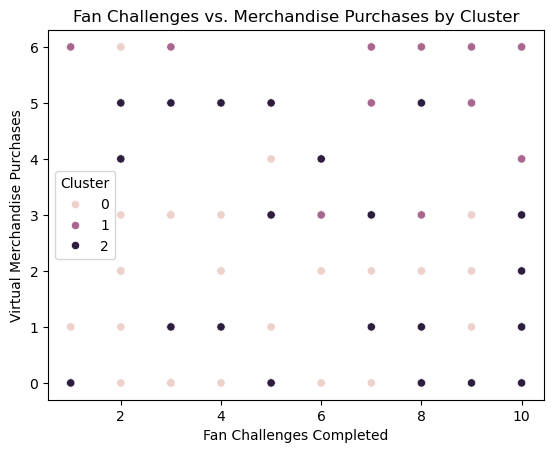

In [17]:
sns.scatterplot(x='Fan Challenges Completed', y='Virtual Merchandise Purchases', hue='Cluster', data=data)
plt.title('Fan Challenges vs. Merchandise Purchases by Cluster')
plt.show()

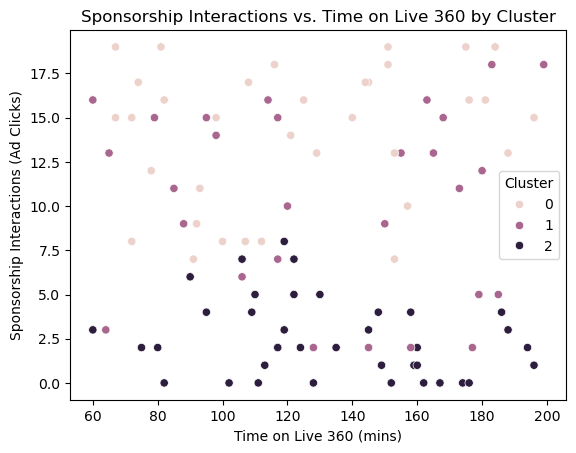

In [18]:
sns.scatterplot(x='Time on Live 360 (mins)', y='Sponsorship Interactions (Ad Clicks)', hue='Cluster', data=data)
plt.title('Sponsorship Interactions vs. Time on Live 360 by Cluster')
plt.show()

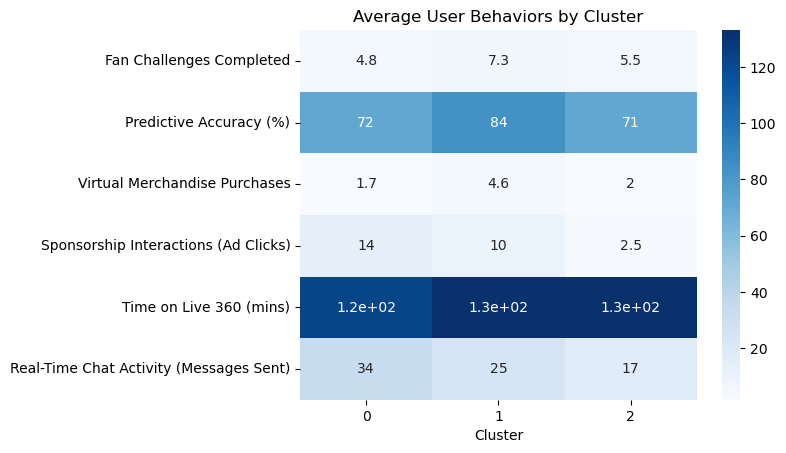

In [20]:
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

cluster_insights = data[['Cluster']].join(numeric_columns).groupby('Cluster').mean()

sns.heatmap(cluster_insights.T, annot=True, cmap='Blues')
plt.title('Average User Behaviors by Cluster')
plt.show()

# Propose a new fan challenge based on your analysis, with predicted outcomes for engagement and monetization. 

# "Race Predictor Showdown"
Overview:

The "Race Predictor Showdown" challenge encourages fans to predict key race outcomes in a competitive format, integrating elements of skill, strategy, and social interaction. Users will make predictions on various metrics, such as the winning team, the vehicle with the most laps, or the fastest pit stop, earning points based on accuracy and timeliness of their predictions.

Challenge Details:

Users will predict:
Which vehicle will win the race.
Which vehicle will complete the most laps without recharging.
The fastest pit stop time for each team.


Predictions must be submitted before the race starts and will be locked once the race begins.


Scoring System:
Accurate Predictions: Points awarded for correct predictions:
Winning vehicle: 10 points
Most laps: 5 points
Fastest pit stop: 3 points



Extra points for submitting predictions early (e.g., 2 additional points for predictions submitted 30 minutes before the race).
Display real-time leaderboards during and after the race, fostering competition among fans.
 Encourage users to share their predictions on social media for additional points or rewards, promoting organic reach.


Engagement:
 Based on analysis, Cluster 1 users are highly engaged with challenges. This competition format can attract more users, including those from Clusters 0 and 2, by appealing to their competitive spirit.
 The challenge will drive users to engage with the Live 360 feature and real-time chats, increasing activity during race events.
 The competitive nature will keep users returning for each race, boosting overall app engagement metrics.

 
Monetization:
Offer exclusive virtual merchandise rewards for challenge winners (e.g., custom vehicle skins or badges), incentivizing purchases.
Brands can sponsor the challenge and offer rewards for participants, increasing ad interactions. Sponsored ads can be integrated into the challenge leaderboard or prediction submission pages.
Consider a tiered system where users can pay for additional predictive analytics or insights, enhancing their chances of winning.


The "Race Predictor Showdown" challenge leverages fan engagement data to create a dynamic and interactive experience. With its focus on competition, timely predictions, and social interaction, it is likely to boost app usage, increase user retention, and drive monetization through merchandise and sponsorships.